<a href="https://colab.research.google.com/github/Marcin19721205/MachineLearingBootCampPartII/blob/main/11_tsne_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Załadowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Standaryzacja](#3)
5. [PCA](#4)
6. [t-SNE](#5)
7. [Porównanie PCA vs. t-SNE](#6)
8. [50 komponentów](#7)




### <a name='0'></a> Import bibliotek

In [ ]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

np.random.seed(42)

Using TensorFlow backend.


### <a name='1'></a> Załadowanie danych

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


### <a name='2'></a> Wizualizacja danych

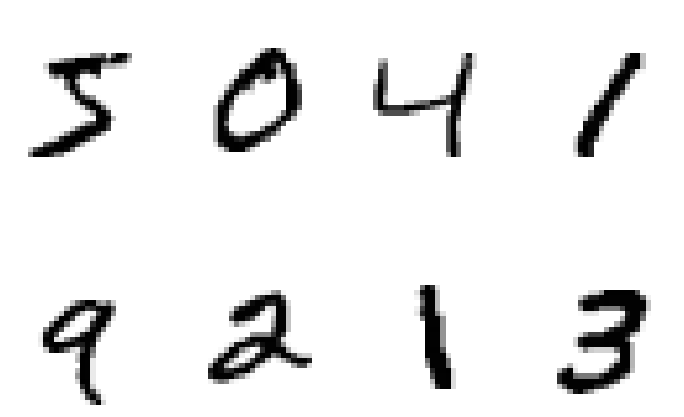

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(y_train[i], color='white', fontsize=17)
    plt.axis('off')
plt.show()

In [ ]:
X_train = X_train[:10000]
y_train = y_train[:10000]
X_train = X_train.reshape(-1, 28 * 28)
X_train.shape

(10000, 784)

### <a name='3'></a> Standaryzacja

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

### <a name='4'></a> PCA


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 3)

Wyjaśniona wariancja

In [ ]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

explained_variance_ratio  cumulative  component
0                  0.061640    0.061640          1
1                  0.043662    0.105302          2
2                  0.040458    0.145760          3

In [ ]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [ ]:
X_train_pca_df = pd.DataFrame(data=np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype(str)
X_train_pca_df.head()

pca_1      pca_2     pca_3 class
0 -0.997652  -4.652699 -0.740638   5.0
1  8.682758  -7.123700 -4.194685   0.0
2  2.439059  10.567253 -4.058946   4.0
3 -7.291486  -3.686136  3.065267   1.0
4 -4.791478   4.498237 -5.603298   9.0

In [ ]:
px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5, width=950,
           title='PCA - 2 components', template='plotly_dark')

In [ ]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class',
              opacity=0.5, width=950, height=700, title='PCA - 3 components', template='plotly_dark')

### <a name='5'></a> t-SNE
2 components


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.103s...
[t-SNE] Computed neighbors for 10000 samples in 187.651s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.161201
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.463593
[t-SNE] KL divergence after 1000 iterations: 1.717055


In [ ]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

tsne_1     tsne_2 class
0     12.473772 -33.515553   5.0
1     68.135033  17.868418   0.0
2     -4.705827  67.267838   4.0
3    -50.587410 -34.830677   1.0
4    -50.632835  51.756950   9.0
...         ...        ...   ...
9995   6.150591 -58.521179   5.0
9996   7.073588   1.352484   8.0
9997  53.151417 -32.478165   6.0
9998 -37.292786  38.642384   9.0
9999 -81.840477   6.966213   7.0

[10000 rows x 3 columns]

Wizualizacja t-SNE

In [ ]:
px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 2 components')

### <a name='6'></a> Porównanie PCA vs. t-SNE

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=['PCA', 't-SNE'], horizontal_spacing=0.03)

fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0, 10):
    fig.add_trace(fig1['data'][i], row=1, col=1)
    fig.add_trace(fig2['data'][i], row=1, col=2)
fig.update_layout(width=950, showlegend=False, template='plotly_dark')
fig.show()

### <a name='7'></a> 50 komponentów

In [ ]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 50)

In [ ]:
tsne = TSNE(n_components=2, verbose=1)
X_train_tsne_50 = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.078s...
[t-SNE] Computed neighbors for 10000 samples in 15.223s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.745719
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.369980
[t-SNE] KL divergence after 1000 iterations: 1.651953


In [ ]:
X_train_tsne_50_df = pd.DataFrame(data=np.c_[X_train_tsne_50, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_50_df['class'] = X_train_tsne_50_df['class'].astype(str)
X_train_tsne_50_df

tsne_1     tsne_2 class
0     35.985558  18.815577   5.0
1      6.941176  78.782066   0.0
2    -43.805382  20.289879   4.0
3     -4.349764 -79.495018   1.0
4    -57.180016 -12.975603   9.0
...         ...        ...   ...
9995  57.355835  -1.415797   5.0
9996   0.678481 -10.496089   8.0
9997  64.333412  21.192741   6.0
9998 -53.460346 -15.561502   9.0
9999 -37.862030 -57.606266   7.0

[10000 rows x 3 columns]

In [ ]:
px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='t-SNE - 2 components after PCA')

In [ ]:
fig = make_subplots(rows=1, cols=3, subplot_titles=['PCA', 't-SNE', 't-SNE after PCA'], horizontal_spacing=0.03)

fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)
fig3 = px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0, 10):
    fig.add_trace(fig1['data'][i], row=1, col=1)
    fig.add_trace(fig2['data'][i], row=1, col=2)
    fig.add_trace(fig3['data'][i], row=1, col=3)
fig.update_layout(width=950, height=450, showlegend=False, template='plotly_dark')
fig.show()

3 components

In [ ]:
tsne = TSNE(n_components=3, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.072s...
[t-SNE] Computed neighbors for 10000 samples in 16.159s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.745719
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.449646
[t-SNE] KL divergence after 1000 iterations: 1.453648


In [ ]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'tsne_3', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

tsne_1     tsne_2     tsne_3 class
0     -7.249687  13.325682   2.836154   5.0
1     -4.740350  14.586839 -16.584131   0.0
2     21.165163  -1.983230  -2.931379   4.0
3    -10.846617   1.473881  15.189384   1.0
4     11.502681 -10.183220   8.579481   9.0
...         ...        ...        ...   ...
9995   6.526671  17.466431  -3.333740   5.0
9996   7.258500   3.066478   0.610006   8.0
9997  10.590039  -8.545794 -15.778984   6.0
9998  10.223157  -7.575271   8.567950   9.0
9999   0.579049  -3.082924  21.704882   7.0

[10000 rows x 4 columns]

In [ ]:
px.scatter_3d(X_train_tsne_df, x='tsne_1', y='tsne_2', z='tsne_3', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 3 components')

In [ ]:
TSNE?